################# **SET UP** #################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading in data and initial look

census_data = pd.read_csv('/content/census-adult data.csv')
census_data.head()
# census_data.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
census_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_class'],
      dtype='object')

In [43]:
# Creating the Hispanic variable

hispanic_countries = [' Puerto-Rico',
                      ' Cuba',
                      ' Honduras',
                      ' Mexico',
                      ' Dominican-Republic',
                      ' Ecuador',
                      ' Columbia',
                      ' Guatemala',
                      ' Nicaragua',
                      ' El-Salvador',
                      ' Peru'
]

for index, person in census_data.iterrows():
  if person['native_country'] in hispanic_countries:
    census_data.at[index, 'hispanic'] = True
  else:
    census_data.at[index, 'hispanic'] = False
    continue
census_data['hispanic'].value_counts()

False    31303
True      1257
Name: hispanic, dtype: int64

In [44]:
# Making the income bracket variable binary

census_data['income_bin'] = np.where(census_data['income_class'] == ' >50K', 1, 0)
census_data.head()
# census_data['income_class'].unique()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,hispanic,income_bin,edu_sort
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,0,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,0,HS-grad
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,0,HS-nongrad
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,0,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False,0,Masters


In [45]:
# Sorting the education variable
# Didn't end up using

for index, person in census_data.iterrows():
  if person['education'] == ' 9th':
        census_data.at[index, 'edu_sort'] = 'HS-nongrad'
  elif person['education'] == ' 10th':
        census_data.at[index, 'edu_sort'] = 'HS-nongrad'
  elif person['education'] == ' 11th':
        census_data.at[index, 'edu_sort'] = 'HS-nongrad'
  elif person['education'] == ' 12th':
        census_data.at[index, 'edu_sort'] = 'HS-nongrad'
  elif person['education'] == ' 7th-8th':
        census_data.at[index, 'edu_sort'] = 'Elem-mid'
  elif person['education'] == ' 5th-6th':
        census_data.at[index, 'edu_sort'] = 'Elem-mid'
  elif person['education'] == ' 1st-4th':
        census_data.at[index, 'edu_sort'] = 'Elem-mid'
  else:
    census_data.at[index, 'edu_sort'] = person['education']
census_data['edu_sort'].unique()
census_data['edu_sort'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
HS-nongrad        3055
 Masters          1723
 Assoc-voc        1382
Elem-mid          1147
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
 Preschool          51
Name: edu_sort, dtype: int64

In [47]:
# Creating a new data frame with only the variables of interest
newdata = {
    'Education': census_data['education_num'],
    'Race': census_data['race'],
    'Sex': census_data['sex'],
    'Hispanic': census_data['hispanic'],
    'Income': census_data['income_bin']
}

census = pd.DataFrame(newdata)
census.head()
# census['Income'].value_counts()
# census.shape

,Education,Race,Sex,Hispanic,Income
0,13,White,Male,False,0
1,9,White,Male,False,0
2,7,Black,Male,False,0
3,13,Black,Female,True,0
4,14,White,Female,False,0


I used Education (education_num), Race, Sex, and whether or not a person has Hispanic ethnic backgrounds or not as my variables to interpret Income. I chose education because it often has a strong correlation with income. I chose the other three to investigate whether there are gender, racial, and/or ethnic differences in income rates.

################# **USING STATMODEL** #################

In [48]:
x = census
y = census['Income']

In [49]:
# Creating training and testing groups

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size = 0.8,
    random_state = 16
)

In [50]:
print("Size of Training Samples: ", len(y_train))
print("Size of Testing Samples: ", len(y_test))

Size of Training Samples:  26048
Size of Testing Samples:  6512


In [51]:
print("Number of observations for the 'Low Income' outcome in test data: ", (y_test == 0).sum())
print("Number of observations for the 'High Income' outcome in test data: ", (y_test == 1).sum())

print("Number of observations for the 'Low Income' outcome in train data: ", (y_train == 0).sum())
print("Number of observations for the 'High Income' outcome in train data: ", (y_train == 1).sum())

Number of observations for the 'Low Income' outcome in test data:  4954
Number of observations for the 'High Income' outcome in test data:  1558
Number of observations for the 'Low Income' outcome in train data:  19765
Number of observations for the 'High Income' outcome in train data:  6283


In [54]:
# Executing the logistic regression

from statsmodels.formula.api import logit

logreg =logit('Income ~ Education + Hispanic + Race + Sex', data = x_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.459156
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Income   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26040
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.1689
Time:                        00:41:18   Log-Likelihood:                -11960.
converged:                       True   LL-Null:                       -14391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -6.8948      0.241    -28.654      0.000   

In [55]:
# Executing the predictive analysis

exdat = x_test[["Education", "Hispanic", "Race", "Sex"]]
x_test['pred'] = logreg.predict(exdat)
x_test.head()

,Education,Race,Sex,Hispanic,Income,pred
20703,12,White,Male,False,1,0.446913
11989,9,White,Male,False,1,0.207848
2020,16,White,Male,False,0,0.783567
32290,10,Black,Female,False,0,0.055975
30286,9,Black,Male,False,0,0.134267


In [57]:
# Rounding the predictive values to make it binary

x_test["pred_bin"] = np.where(x_test["pred"] > 0.5, 1, 0)
x_test[:5]

,Education,Race,Sex,Hispanic,Income,pred,pred_bin
20703,12,White,Male,False,1,0.446913,0
11989,9,White,Male,False,1,0.207848,0
2020,16,White,Male,False,0,0.783567,1
32290,10,Black,Female,False,0,0.055975,0
30286,9,Black,Male,False,0,0.134267,0


In [59]:
x_test["pred_acc"]= np.where(x_test["pred_bin"] == x_test["Income"],'Right','Wrong')
x_test.head()

,Education,Race,Sex,Hispanic,Income,pred,pred_bin,pred_acc
20703,12,White,Male,False,1,0.446913,0,Wrong
11989,9,White,Male,False,1,0.207848,0,Wrong
2020,16,White,Male,False,0,0.783567,1,Wrong
32290,10,Black,Female,False,0,0.055975,0,Right
30286,9,Black,Male,False,0,0.134267,0,Right


In [63]:
# Ensuring the indices are the same

print('# of observations =', {len(x_test)})
print('# of predictions =', {len(x_test['pred'])})

# of observations = {6512}
# of predictions = {6512}


In [65]:
# Creating the prediction accuracy

print("True Predictions: ", len(x_test.query("pred_acc == 'Right'")))
print("False Predictions: ", len(x_test.query("pred_acc == 'Wrong'")))
print("Prediction Accuracy: ", len(x_test.query("pred_acc == 'Right'"))/len(y_test))

True Predictions:  5096
False Predictions:  1416
Prediction Accuracy:  0.7825552825552825


################# **USING SKLEARN** #################


In [67]:
# Making the sex variable binary
census['Sex'].unique()

census['Sex_bin'] = np.where(census['Sex'] == ' Male', 0, 1)
census['Sex_bin'].value_counts()

0    21789
1    10771
Name: Sex_bin, dtype: int64

In [68]:
# Order of 'Rank' within Race was determined by ascending order of the coeffecients from the previous logistic regression using StatModel.
# i.e., races with lower coefficients will be lower in order, and vice versa.

census['Race'].unique()

race_ordered =[' Other', ' Black', ' Amer-Indian-Eskimo',' Asian-Pac-Islander', ' White']

census['Race_ord'] = census['Race'].map({race: i for i, race in enumerate(race_ordered)})
census['Race_ord'].unique()
census.head()

,Education,Race,Sex,Hispanic,Income,Sex_bin,Race_ord
0,13,White,Male,False,0,0,4
1,9,White,Male,False,0,0,4
2,7,Black,Male,False,0,0,1
3,13,Black,Female,True,0,1,1
4,14,White,Female,False,0,1,4


In [69]:
X = census[['Education', 'Hispanic', 'Sex_bin', 'Race_ord']]
Y = census['Income']

In [72]:
# Creating training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    train_size = 0.8,
    random_state = 16,
)

In [73]:
# Executing the regression

from sklearn.linear_model import LogisticRegression

lgrg = LogisticRegression()

lgrg.fit(X_train, Y_train)

coeffs = lgrg.coef_
print("Coefficients:", coeffs)
intercept = lgrg.intercept_
print("Intercept:", intercept)

Coefficients: [[ 0.37390496 -0.62584343 -1.33252344  0.19132596]]
Intercept: [-5.4723264]


In [74]:
y_pred = lgrg.predict(X_test)

In [75]:
# Creating the training accuracy

train_accuracy = lgrg.score(X_test, y_test)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.7820945945945946


In [76]:
# Creating the classification report with accuracy score, precision score, recall score, and f1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average= None)
recall_micro = recall_score(y_test, y_pred, average=None)
f1_micro = f1_score(y_test, y_pred, average=None)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      4954
           1       0.57      0.37      0.45      1558

    accuracy                           0.78      6512
   macro avg       0.69      0.64      0.66      6512
weighted avg       0.76      0.78      0.76      6512



################# **VISUALIZATIONS** #################




In [77]:
# Creating confusion matrices

from sklearn.metrics import confusion_matrix

actual = x_test["Income"]
predicted = x_test["pred_bin"]

cm = confusion_matrix(actual, predicted)
cm

array([[4512,  442],
       [ 974,  584]])

In [78]:
cm2 = confusion_matrix(Y_test, y_pred)
cm2

array([[4515,  439],
       [ 980,  578]])

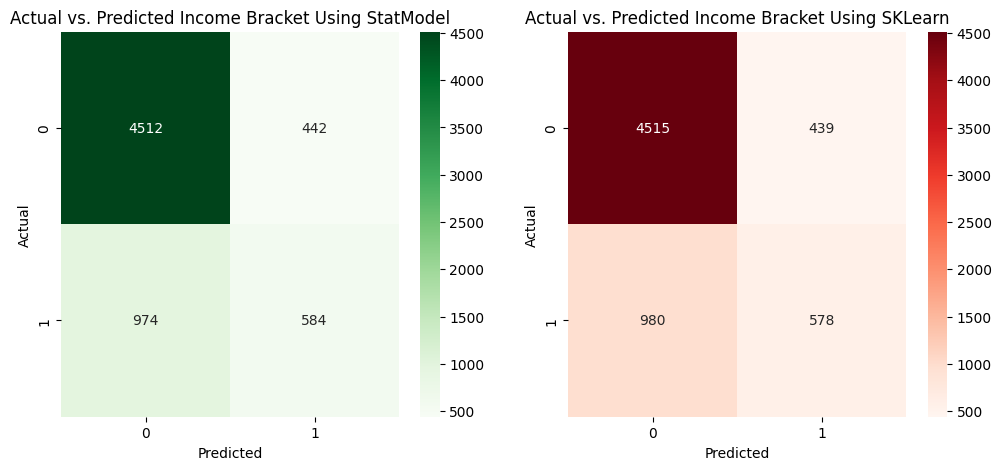

In [79]:
# Making the heatmaps

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1, figsize=[12, 5])

plt.subplot(1, 2, 1)
hm1 = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Greens', cbar=True)
hm1.set_xlabel('Predicted')
hm1.set_ylabel('Actual')
hm1.set_title('Actual vs. Predicted Income Bracket Using StatModel')

plt.subplot(1, 2, 2)
hm2 = sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds', cbar=True)
hm2.set_xlabel('Predicted')
hm2.set_ylabel('Actual')
hm2.set_title('Actual vs. Predicted Income Bracket Using SKLearn')

plt.show()

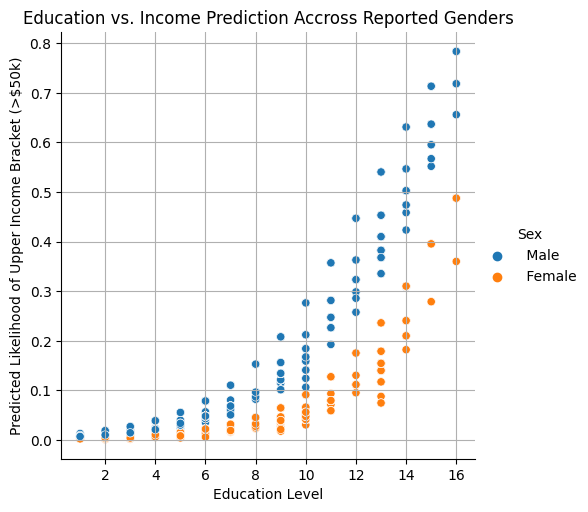

In [81]:
# Making the relationship plot

rlplt = sns.relplot(data = x_test, x = 'Education', y = 'pred', hue = 'Sex')

for ax in rlplt.axes.flatten():
    ax.set_title('Education vs. Income Prediction Accross Reported Genders')
    ax.set_ylabel('Predicted Likelihood of Upper Income Bracket (>$50k)')
    ax.set_xlabel('Education Level')
    ax.grid(True)

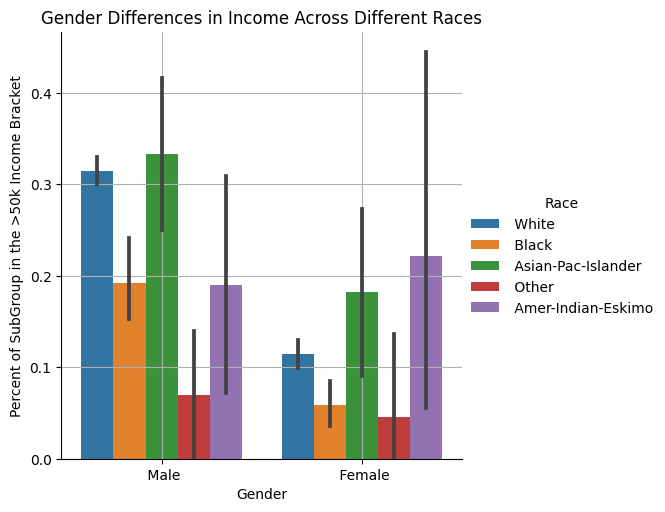

In [82]:
# Making the barchart

bar = sns.catplot(data = x_test, x = "Sex", y = "Income", hue="Race", kind="bar")
for ax in bar.axes.flatten():
  ax.set_ylabel('Percent of SubGroup in the >50k Income Bracket')
  ax.set_xlabel('Gender')
  ax.set_title('Gender Differences in Income Across Different Races')
  ax.grid(True)


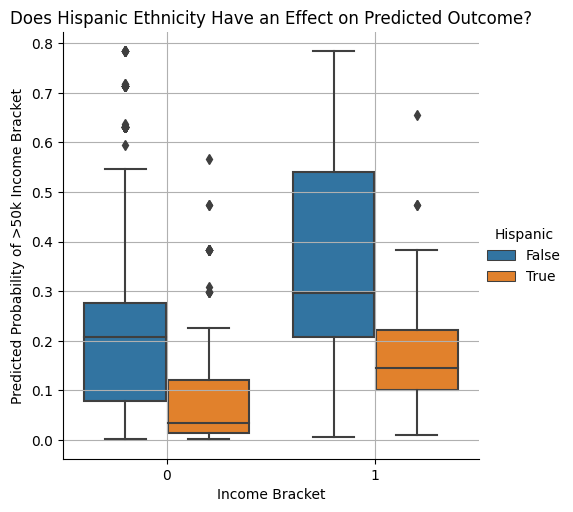

In [83]:
# Making the boxplot

box = sns.catplot(data=x_test, x="Income", y="pred", hue="Hispanic", kind="box")

for ax in box.axes.flatten():
  ax.set_ylabel('Predicted Probability of >50k Income Bracket')
  ax.set_xlabel('Income Bracket')
  ax.set_title('Does Hispanic Ethnicity Have an Effect on Predicted Outcome?')
  ax.grid(True)